# Pràctica 3: Regressió Logistica


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. Ús LogisticRegression (20%)
* B. Regularitzadors (40%)
* C. Demostració Error de Variance (20%)
* D. Demostració Error de Bias (20%)

A continuació veurem un exemple de regressió lineal, i com es comporta el regressor logistic.

C:\Users\ramon\AppData\Local\Temp/ipykernel_31732/2009270985.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (X > d).astype(np.float)


(-2.5529898158340787, 2.2697546239876076)

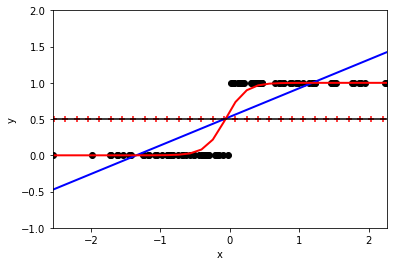

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
 

def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
d = 0
X = np.random.normal(size = 100) + d
xmin, xmax = X.min(), X.max()

y = (X > d).astype(np.float) 
X = X[:, np.newaxis] 
X_test = np.linspace(-4, 4, 50)

# Linear Regression:
rgr = linear_model.SGDRegressor(loss='squared_loss', learning_rate='constant', eta0=0.01)
rgr.fit(X, y)
plt.plot(X_test, rgr.coef_.ravel() * X_test + rgr.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=0.05, max_iter=1000000)
clf.fit(X, y)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)


plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')
plt.scatter(X_test, X_test*0+0.5, color = 'red', marker='+')

plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(xmin, xmax)


Per cert, recordeu el què significa el error de Variança i el de bias.

<img src="bias_variance.png" width=600 height=600 />

In [3]:
# Codi esquelet per la pràctica de la 3 sessió: Regressió Logistica

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('winequalityN.csv')
dataset = dataset.dropna()
dataset['is_red_wine'] = (dataset["type"] == 'red').astype(int)


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6463, 14)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [4]:
display(dataset)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white          7.000             0.270        0.360          20.700   
1     white          6.300             0.300        0.340           1.600   
2     white          8.100             0.280        0.400           6.900   
3     white          7.200             0.230        0.320           8.500   
4     white          7.200             0.230        0.320           8.500   
...     ...            ...               ...          ...             ...   
6491    red          6.800             0.620        0.080           1.900   
6492    red          6.200             0.600        0.080           2.000   
6494    red          6.300             0.510        0.130           2.300   
6495    red          5.900             0.645        0.120           2.000   
6496    red          6.000             0.310        0.470           3.600   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045               45.000               170.000    1.001 3.000   
1         0.049               14.000               132.000    0.994 3.300   
2         0.050               30.000                97.000    0.995 3.260   
3         0.058               47.000               186.000    0.996 3.190   
4         0.058               47.000               186.000    0.996 3.190   
...         ...                  ...                   ...      ...   ...   
6491      0.068               28.000                38.000    0.997 3.420   
6492      0.090               32.000                44.000    0.995 3.450   
6494      0.076               29.000                40.000    0.996 3.420   
6495      0.075               32.000                44.000    0.995 3.570   
6496      0.067               18.000                42.000    0.995 3.390   

      sulphates  alcohol  quality  is_red_wine  
0         0.450    8.800        6            0  
1         0.490    9.500        6            0  
2         0.440   10.100        6            0  
3         0.400    9.900        6            0  
4         0.400    9.900        6            0  
...         ...      ...      ...          ...  
6491      0.820    9.500        6            1  
6492      0.580   10.500        5            1  
6494      0.750   11.000        6            1  
6495      0.710   10.200        5            1  
6496      0.660   11.000        6            1  

[6463 rows x 14 columns]

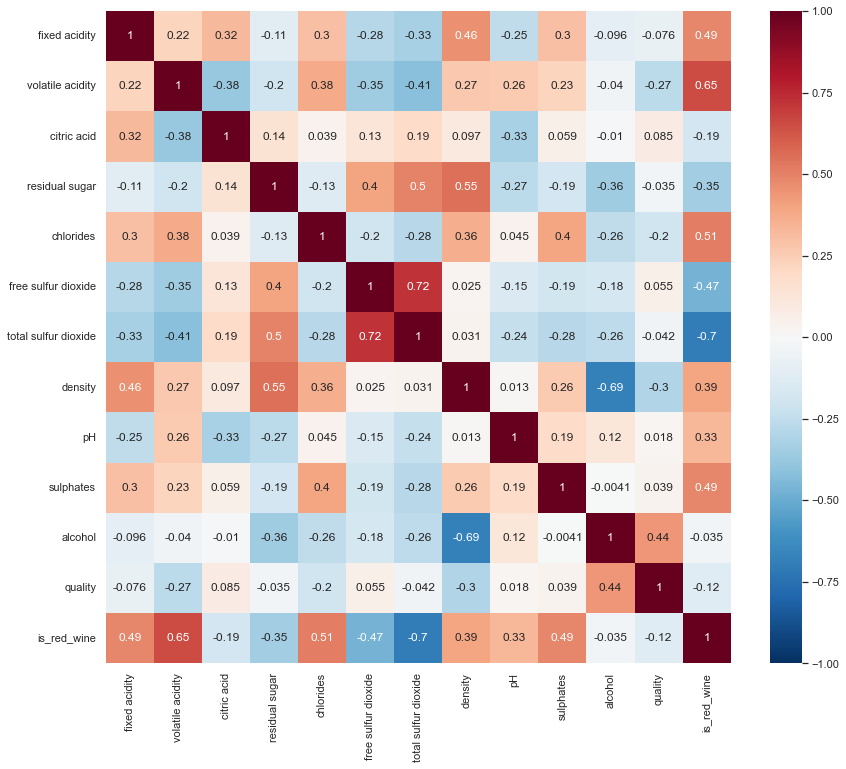

In [5]:
correlation = dataset.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [6]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

In [7]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="red"], ax=axs)
plt.title('quality VS alcohol in white')

plt.tight_layout()
plt.show()
plt.gcf().clear()

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="white"], ax=axs)
plt.title('quality VS alcohol in red')

plt.tight_layout()
plt.show()
plt.gcf().clear()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Abans de començar amb els exercicis, preparem les dades per a que sigui una classificació binaria

In [9]:
#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for great quality
quality_labels=[0,1]
dataset['quality_categorical'] = pd.cut(dataset['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = dataset['quality_categorical']
features_raw = dataset.drop(['type', 'quality', 'quality_categorical'], axis = 1)


In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples. {:.1f}% is positive".format(X_train.shape[0], 100*sum(y_train)/y_train.shape[0]))
print("Testing set has {} samples. {:.1f}% is positive".format(X_test.shape[0], 100*sum(y_test)/y_test.shape[0]))

display(X_test)

## A. Ús LogisticRegression (20%)

En aquesta secció us demanem que apliqueu de sklearn el model de  regressió logística amb Descens del Gradient ([SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)):

Si feu proves amb diferents parametres, guardeu els resultats que obtingueu en una taula de pandas i els mostreu.

* Guarda resultats de temps, de precisió, de accuracy, tant de train com de test

cal veure l'efecte de 
* canviar el *learning rate*,
* el tamany del conjunt d'entrenament
* normalitzar les dades


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


def entrena_prediu_evalua(model, X_train, y_train, X_test, y_test, sample_size=1): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X_train: caracteristiques entrenament
       - y_train: etiqueta entrenament
       - X_test: caracteristiques test
       - y_test: etiqueta test
    '''
    
    results = {}

    """
    Entrenar el model tenint en compte el 'sample_size'  [:len(y_train)*sample_size]
    """

    
    """
    Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
    """
    
    """
    Calcular el accuracy i el F1-score del train i del test
    """
    results['temps'] = 
    results['accuracy_training'] = 
    results['f1_training'] = 
    results['accuracy_test'] = 
    results['f1_test'] = 

    print("{} s'ha entrenat amb el {}% de mostres.".format(model.__class__.__name__, ))
    
    
    return results


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', penalty='l2',alpha=0, learning_rate='adaptive',eta0=0.01,max_iter=1000000)
samples = 1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
results = entrena_prediu_evalua(clf, X_train, y_train, X_test, y_test, samples)

## B. Regularitzadors (40%)

* Descriu el parametre **penalty** de LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

* Què representen els atributs *coef_* i *intercept_*. Mostra'ls. Hi veus alguna diferencia depenen del regularitzador utilitzat?

* Què fa el parametre *alpha*. En quins casos afecta? Fes una taula mostrant els resultats.



## C. Demostració Error de Bias (20%)

* Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)

* Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % de entrenament)

* I si utilitzem poques iteracions limitant el *max_iter*


## D. Demostració Error de Variance (20%)

* Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (es a dir, model massa complexe)

* Crea models de features més complexes amb [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* Podem reduir el error de variança si enlloc de classificar el vi blanc i el negre, els separessim?

* Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?



## E. Extra. Multi class i avaluació (20%)

* Considerant que cada qualitat és una classe, avalua el sisteman usant una aproximació multi-classe. Prova les millors solucions trobades en els punts antriors i compara-les usant ROC curves.

* Considera la qualitat com un valor continuo i compara el punt anterior amb una aproximació basada en regresssió.